In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [18]:
corona_all = pd.read_csv('seoul_covid19_9_28_.csv',encoding='cp949')

In [19]:
corona_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN


In [20]:
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5242 non-null   int64 
 1   환자      5242 non-null   int64 
 2   확진일     5242 non-null   object
 3   거주지     5242 non-null   object
 4   여행력     5242 non-null   object
 5   접촉력     5242 non-null   object
 6   퇴원현황    4454 non-null   object
dtypes: int64(2), object(5)
memory usage: 286.8+ KB


### 데이터 정제

In [22]:
corona_all.sort_values(by=['연번'])

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5241,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원
...,...,...,...,...,...,...,...
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN


In [23]:
df = corona_all.sort_values(by=['연번'],ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN


In [24]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5237,5,9,1.31.,성북구,-,#5 접촉,퇴원
5238,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5239,3,6,1.30.,종로구,-,#3 접촉,퇴원
5240,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5241,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


### 확진일

In [27]:
df['확진일'].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.30.      1
4.24.      1
4.20.      1
4.15.      1
1.24.      1
Name: 확진일, Length: 221, dtype: int64

In [28]:
df['확진일'] = pd.to_datetime('2020-'+df['확진일'].str.replace(',','-'))

In [30]:
df[['확진일']]

,확진일
0,2020-09-28
1,2020-09-28
2,2020-09-28
3,2020-09-28
4,2020-09-28
...,...
5237,2020-01-31
5238,2020-01-30
5239,2020-01-30
5240,2020-01-30


In [31]:
df['월']=df['확진일'].dt.month
df[['월']]

,월
0,9
1,9
2,9
3,9
4,9
...,...
5237,1
5238,1
5239,1
5240,1


In [32]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월
0,5242,23696,2020-09-28,도봉구,-,도봉구 다나병원,NaN,9
1,5241,23697,2020-09-28,도봉구,-,도봉구 다나병원,NaN,9
2,5240,23698,2020-09-28,관악구,-,확진자 조사 중,NaN,9
3,5239,23685,2020-09-28,영등포구,-,확진자 조사 중,NaN,9
4,5238,23675,2020-09-28,성북구,-,기타 확진자 접촉,NaN,9
...,...,...,...,...,...,...,...,...
5237,5,9,2020-01-31,성북구,-,#5 접촉,퇴원,1
5238,4,7,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,1
5239,3,6,2020-01-30,종로구,-,#3 접촉,퇴원,1
5240,2,5,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,1


In [34]:
df['주']=df['확진일'].dt.week
df[['주']]

C:\Users\yj\AppData\Local\Temp/ipykernel_4364/3222036433.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['주']=df['확진일'].dt.week


,주
0,40
1,40
2,40
3,40
4,40
...,...
5237,5
5238,5
5239,5
5240,5


### 선 그래프 그리기

In [36]:
df['확진일']

0      2020-09-28
1      2020-09-28
2      2020-09-28
3      2020-09-28
4      2020-09-28
          ...    
5237   2020-01-31
5238   2020-01-30
5239   2020-01-30
5240   2020-01-30
5241   2020-01-24
Name: 확진일, Length: 5242, dtype: datetime64[ns]

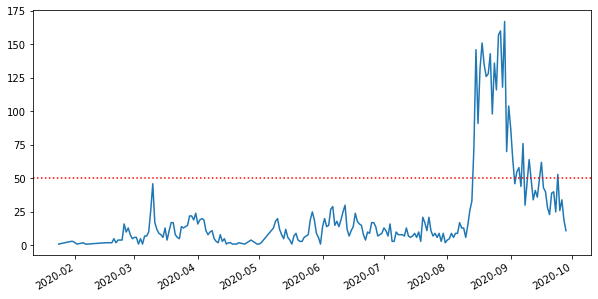

In [39]:
df['확진일'].value_counts().sort_index().plot(figsize=(10,5))
plt.axhline(50,color='r',linestyle=':')

In [41]:
df['퇴원'] = df['퇴원현황'].str.contains('퇴원')
df[['퇴원']]

,퇴원
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5237,True
5238,True
5239,True
5240,True


In [42]:
df['퇴원'].value_counts()

True     4399
False      55
Name: 퇴원, dtype: int64

In [43]:
df['퇴원'].value_counts(normalize=True)

True     0.987652
False    0.012348
Name: 퇴원, dtype: float64

In [44]:
df['퇴원'].value_counts(normalize=True) * 100

True     98.765155
False     1.234845
Name: 퇴원, dtype: float64

In [45]:
df[df['퇴원']==False]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,주,퇴원
783,4459,21525,2020-09-08,성북구,-,확인 중,사망,9,37,False
991,4251,21075,2020-09-04,기타,-,송파구 소재병원,사망,9,36,False
1034,4208,20939,2020-09-04,은평구,-,확인 중,사망,9,36,False
1071,4171,20753,2020-09-02,성북구,-,성북구 요양시설,사망,9,36,False
1156,4086,20532,2020-09-01,서대문구,-,서대문구 지인모임,사망,9,36,False
1303,3939,20073,2020-08-30,노원구,-,확인 중,사망,8,35,False
1309,3933,20157,2020-08-31,성북구,-,성북구 요양시설,사망,8,36,False
1340,3902,19974,2020-08-30,성동구,-,확인 중,사망,8,35,False
1389,3853,19875,2020-08-30,기타,-,확인 중,사망,8,35,False
1400,3842,19759,2020-08-29,강서구,-,확인 중,사망,8,35,False


In [47]:
df['월일']=df['확진일'].astype(str).map(lambda x:x[-5:])
day_count = df['월일'].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-24    53
09-25    26
09-26    34
09-27    19
09-28    11
Name: 월일, Length: 220, dtype: int64

In [48]:
df['월일'].value_counts().sort_index()

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-24    53
09-25    26
09-26    34
09-27    19
09-28    11
Name: 월일, Length: 220, dtype: int64

Text(2, 3, '20')

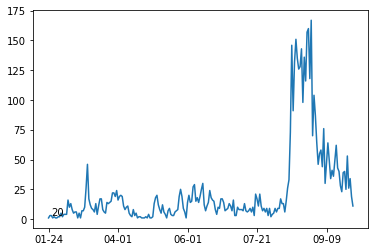

In [51]:
g = day_count.plot()
g.text(x=2,y=3,s=20)

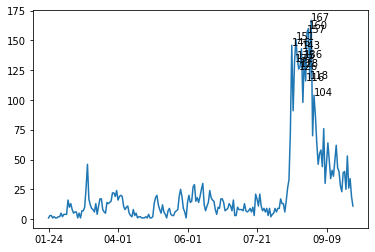

In [52]:
g = day_count.plot()
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 100:
        g.text(x=i,y=case_count,s=case_count)

In [53]:
## 확진자 최다인 날
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [54]:
df[df['월일']=='08-29']

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,주,퇴원,월일
1329,3913,20100,2020-08-29,관악구,-,타시도 확진자 접촉,퇴원,8,35,True,08-29
1364,3878,19716,2020-08-29,동작구,-,성북구 사랑제일교회 관련,퇴원,8,35,True,08-29
1391,3851,19830,2020-08-29,구로구,-,영등포구 권능교회,퇴원,8,35,True,08-29
1392,3850,19849,2020-08-29,노원구,-,노원구 빛가온교회 관련,퇴원,8,35,True,08-29
1393,3849,19898,2020-08-29,금천구,-,타시도 확진자 접촉,퇴원,8,35,True,08-29
...,...,...,...,...,...,...,...,...,...,...,...
1579,3663,19451,2020-08-29,강남구,-,기타 확진자 접촉,퇴원,8,35,True,08-29
1580,3662,19462,2020-08-29,동대문구,-,동대문구 sk탁구클럽,퇴원,8,35,True,08-29
1581,3661,19416,2020-08-29,강북구,-,기타 확진자 접촉,퇴원,8,35,True,08-29
1582,3660,19434,2020-08-29,강북구,-,기타 확진자 접촉,퇴원,8,35,True,08-29


<AxesSubplot:>

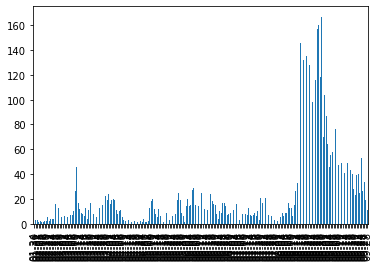

In [55]:
day_count.plot.bar(rot=90)

In [57]:
df.groupby(['월','주']).count()

연번   환자  확진일  거주지  여행력  접촉력  퇴원현황   퇴원   월일
월 주                                               
1 4     1    1    1    1    1    1     1    1    1
  5     6    6    6    6    6    6     6    6    6
2 5     1    1    1    1    1    1     1    1    1
  6     4    4    4    4    4    4     4    4    4
  7     2    2    2    2    2    2     2    2    2
  8    17   17   17   17   17   17    17   17   17
  9    56   56   56   56   56   56    56   56   56
3 9     6    6    6    6    6    6     6    6    6
  10   37   37   37   37   37   37    37   37   37
  11  124  124  124  124  124  124   124  124  124
  12   76   76   76   76   76   76    76   76   76
  13  105  105  105  105  105  105   105  105  105
  14   43   43   43   43   43   43    43   43   43
4 14   85   85   85   85   85   85    85   85   85
  15   47   47   47   47   47   47    47   47   47
  16   15   15   15   15   15   15    15   15   15
  17    4    4    4    4    4    4     4    4    4
  18    5    5    5    5    5    5     5    5    5
5 18    3    3    3    3    3    3     3    3    3
  19   51   51   51   51   51   51    51   51   51
  20   48   48   48   48   48   48    48   48   48
  21   39   39   39   39   39   39    39   39   39
  22   87   87   87   87   87   87    87   87   87
6 23  134  134  134  134  134  134   134  134  134
  24  125  125  125  125  125  125   125  125  125
  25  106  106  106  106  106  106   106  106  106
  26   78   78   78   78   78   78    78   78   78
  27   17   17   17   17   17   17    17   17   17
7 27   50   50   50   50   50   50    50   50   50
  28   57   57   57   57   57   57    57   57   57
  29   48   48   48   48   48   48    48   48   48
  30   97   97   97   97   97   97    96   96   97
  31   29   29   29   29   29   29    29   29   29
8 31    9    9    9    9    9    9     8    8    9
  32   76   76   76   76   76   76    76   76   76
  33  390  390  390  390  390  390   383  383  390
  34  913  913  913  913  913  913   864  864  913
  35  924  924  924  924  924  924   845  845  924
  36  104  104  104  104  104  104    98   98  104
9 36  354  354  354  354  354  354   295  295  354
  37  341  341  341  341  341  341   227  227  341
  38  281  281  281  281  281  281    56   56  281
  39  236  236  236  236  236  236     0    0  236
  40   11   11   11   11   11   11     0    0   11

In [59]:
month_weekly_case = df.groupby(['월','주'])['확진일'].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     17
7  27     50
   28     57
   29     48
   30     97
   31     29
8  31      9
   32     76
   33    390
   34    913
   35    924
   36    104
9  36    354
   37    341
   38    281
   39    236
   40     11
Name: 확진일, dtype: int64

<AxesSubplot:xlabel='월,주'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)


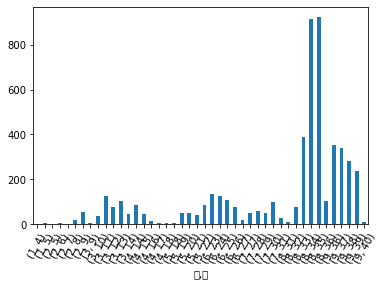

In [61]:
month_weekly_case.plot.bar(rot=60)

In [62]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-24    53
09-25    26
09-26    34
09-27    19
09-28    11
Name: 월일, Length: 220, dtype: int64

In [67]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월,주,퇴원,월일
5237,5,9,2020-01-31,성북구,-,#5 접촉,퇴원,1,5,True,01-31
5238,4,7,2020-01-30,마포구,중국 우한시,해외 접촉,퇴원,1,5,True,01-30
5239,3,6,2020-01-30,종로구,-,#3 접촉,퇴원,1,5,True,01-30
5240,2,5,2020-01-30,중랑구,중국 우한시,해외 접촉,퇴원,1,5,True,01-30
5241,1,2,2020-01-24,강서구,중국 우한시,해외 접촉,퇴원,1,4,True,01-24


In [66]:
df.iloc[-1]

연번                        1
환자                        2
확진일     2020-01-24 00:00:00
거주지                     강서구
여행력                  중국 우한시
접촉력                   해외 접촉
퇴원현황                     퇴원
월                         1
주                         4
퇴원                     True
월일                    01-24
Name: 5241, dtype: object

In [74]:
first_day = df.iloc[-1,2]

In [75]:
first_day

Timestamp('2020-01-24 00:00:00')

In [76]:
last_day = df.iloc[0,2]

In [77]:
last_day

Timestamp('2020-09-28 00:00:00')

In [79]:
days = pd.date_range(first_day,last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26',
               '2020-09-27', '2020-09-28'],
              dtype='datetime64[ns]', length=249, freq='D')

In [80]:
days.to_frame()

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2020-09-24,2020-09-24
2020-09-25,2020-09-25
2020-09-26,2020-09-26
2020-09-27,2020-09-27


In [101]:
pd.DataFrame(days)

,0
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
244,2020-09-24
245,2020-09-25
246,2020-09-26
247,2020-09-27


In [102]:
df_days=pd.DataFrame({'확진일자':days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
244,2020-09-24
245,2020-09-25
246,2020-09-26
247,2020-09-27


In [105]:
daily_case=df['확진일'].value_counts()
daily_case.head()

2020-08-29    167
2020-08-27    160
2020-08-26    157
2020-08-18    151
2020-08-15    146
Name: 확진일, dtype: int64

In [112]:
df_daily_case = pd.DataFrame(daily_case)

In [113]:
df_daily_case

,확진일
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146
...,...
2020-04-24,1
2020-04-20,1
2020-04-19,1
2020-04-15,1


In [114]:
df_daily_case.columns=['확진수']
df_daily_case.head()

,확진수
2020-08-29,167
2020-08-27,160
2020-08-26,157
2020-08-18,151
2020-08-15,146


In [115]:
all_day = df_days.merge(df_daily_case,left_on='확진일자',right_on=df_daily_case.index)

In [116]:
all_day.head(10)

,확진일자,확진수
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
5,2020-02-06,1
6,2020-02-07,1
7,2020-02-16,2
8,2020-02-19,2
9,2020-02-20,5


In [117]:
all_day['확진수'] = all_day['확진수'].fillna(0).astype(int)

In [119]:
all_day['확진수'] = all_day['확진수'].fillna(0).astype(int).cumsum()

In [120]:
all_day[['확진수']]

,확진수
0,1
1,4
2,7
3,8
4,10
...,...
215,5152
216,5178
217,5212
218,5231


In [121]:
all_day['누적확진'] = all_day['확진수'].fillna(0).astype(int).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1,1
1,2020-01-30,4,5
2,2020-01-31,7,12
3,2020-02-02,8,20
4,2020-02-05,10,30
...,...,...,...
215,2020-09-24,5152,308627
216,2020-09-25,5178,313805
217,2020-09-26,5212,319017
218,2020-09-27,5231,324248


In [122]:
all_day['확진일자'].astype(str).map(lambda x: x).head()

0    2020-01-24
1    2020-01-30
2    2020-01-31
3    2020-02-02
4    2020-02-05
Name: 확진일자, dtype: object

In [123]:
all_day['확진일자'].astype(str).map(lambda x: x[-5:]).head()

0    01-24
1    01-30
2    01-31
3    02-02
4    02-05
Name: 확진일자, dtype: object

In [124]:
all_day['일자'] = all_day['확진일자'].astype(str).map(lambda x: x[-5:])

In [125]:
cum_day = all_day[['일자','확진수','누적확진']]
cum_day

,일자,확진수,누적확진
0,01-24,1,1
1,01-30,4,5
2,01-31,7,12
3,02-02,8,20
4,02-05,10,30
...,...,...,...
215,09-24,5152,308627
216,09-25,5178,313805
217,09-26,5212,319017
218,09-27,5231,324248


In [126]:
cum_day = cum_day.set_index('일자')
cum_day

,확진수,누적확진
일자,,
01-24,1,1
01-30,4,5
01-31,7,12
02-02,8,20
02-05,10,30
...,...,...
09-24,5152,308627
09-25,5178,313805
09-26,5212,319017


<AxesSubplot:xlabel='일자'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45572 missing from c

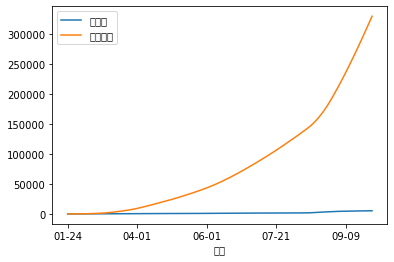

In [127]:
cum_day.plot()

<AxesSubplot:xlabel='일자'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


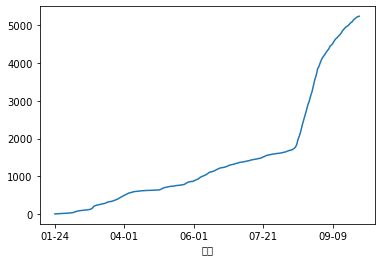

In [128]:
cum_day['확진수'].plot()

In [129]:
np.log(cum_day['누적확진']+1)

일자
01-24     0.693147
01-30     1.791759
01-31     2.564949
02-02     3.044522
02-05     3.433987
           ...    
09-24    12.639892
09-25    12.656530
09-26    12.673003
09-27    12.689267
09-28    12.705304
Name: 누적확진, Length: 220, dtype: float64

<AxesSubplot:xlabel='일자'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


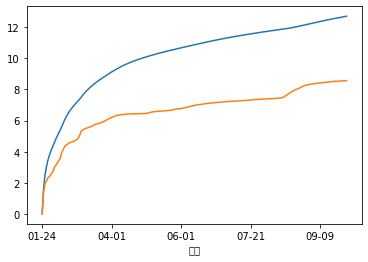

In [130]:
np.log(cum_day['누적확진']).plot()
np.log(cum_day['확진수']).plot()

In [131]:
all_day['확진일자'].dt.month

0      1
1      1
2      1
3      2
4      2
      ..
215    9
216    9
217    9
218    9
219    9
Name: 확진일자, Length: 220, dtype: int64

In [132]:
all_day['확진일'] = all_day['확진일자'].dt.month
all_day['확진요일'] = all_day['확진일자'].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진일,확진요일
0,2020-01-24,1,1,01-24,1,4
1,2020-01-30,4,5,01-30,1,3
2,2020-01-31,7,12,01-31,1,4
3,2020-02-02,8,20,02-02,2,6
4,2020-02-05,10,30,02-05,2,2


In [133]:
all_day.groupby(['확진일','확진요일']).sum()

확진수     누적확진
확진일 확진요일                
1   3         4        5
    4         8       13
2   0        35      220
    1        51      271
    2        87      445
    3       106      551
    4       117      668
    5       114      729
    6        53      272
3   0      1311    19232
    1      1400    20632
    2       968    12927
    3      1012    13939
    4      1060    14999
    5      1105    16104
    6      1242    17921
4   0      2443    70783
    1      1827    50270
    2      1705    39570
    3      2365    64275
    4      2385    64764
    5      1778    44835
    6      1798    46633
5   0      2226    96393
    1      2262    98655
    2      2296   100951
    3      2330   103281
    4      3633   154134
    5      3669   157803
    6      3061   136618
6   0      5566   291907
    1      5633   297540
    2      4377   225635
    3      4452   230087
    4      4542   234629
    5      4612   239241
    6      4649   243890
7   0      5889   398724
    1      5931   404655
    2      7295   488232
    3      7353   495585
    4      7387   502972
    5      5824   386983
    6      5852   392835
8   0     12671   783897
    1      8940   596329
    2      9267   605596
    3      9595   615191
    4      9931   625122
    5     12007   758942
    6     12284   771226
9   0     19475  1108007
    1     18458   993483
    2     18656  1012139
    3     18862  1031001
    4     19032  1050033
    5     19186  1069219
    6     19313  1088532

<AxesSubplot:xlabel='확진일,확진요일'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51652 missing from cur

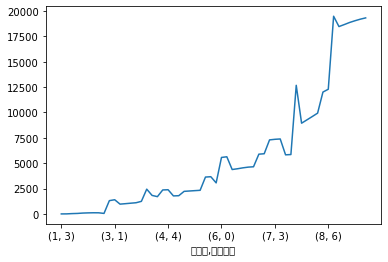

In [136]:
all_day_week = all_day.groupby(['확진일','확진요일'])['확진수'].sum().plot()
all_day_week

In [137]:
all_day_week = all_day.groupby(['확진일','확진요일'])['확진수'].sum()
all_day_week.unstack()

확진요일,0,1,2,3,4,5,6
확진일,,,,,,,
1,NaN,NaN,NaN,4.0,8.0,NaN,NaN
2,35.0,51.0,87.0,106.0,117.0,114.0,53.0
3,1311.0,1400.0,968.0,1012.0,1060.0,1105.0,1242.0
4,2443.0,1827.0,1705.0,2365.0,2385.0,1778.0,1798.0
5,2226.0,2262.0,2296.0,2330.0,3633.0,3669.0,3061.0
6,5566.0,5633.0,4377.0,4452.0,4542.0,4612.0,4649.0
7,5889.0,5931.0,7295.0,7353.0,7387.0,5824.0,5852.0
8,12671.0,8940.0,9267.0,9595.0,9931.0,12007.0,12284.0
9,19475.0,18458.0,18656.0,18862.0,19032.0,19186.0,19313.0


In [146]:
all_day_week = all_day_week.unstack()